# Is the Life Expectancy Greater in Developed Countries Compared to Developing Countries?
Arial Chen\
Emily Ahn\
Karina Jhingan\
Zhekai Zhu

----------------------

# Introduction
A country's developed/developing status is mainly based on GDP and living standards. To look at an example of how a country's status may affect its life expectancy: Ethiopia (a developing country) and the United States (a developed country). By comparing the living standards between Ethiopia and the US, Freeman (2020) finds out that the latter has longer life expectancy due to various factors like community-based health strategies, improving access to safe water, female education and gender empowerment, and so on. There is another view that deems that with the improvement of modern technology, the impact on mortality has been overstated for earlier periods (Preston, 1975). This raises the question, is there a difference in life expectancy between developed and developing countries, if so is it significant? The random variable is life expectancy, the location parameter is mean, and the scale parameter is interquartile range. Our population is all countries in the past century(1922-2022), our dataset, provided by the WHO, contains a random sample of annual data observations from 2000-2015 of 193 countries. Each observation contains information on the country and year as well as socioeconomic (government spending, GDP, schooling, alcohol use) and health (BMI, immunizations, diseases) factors.

# Preliminary Results

In [1]:
#Package needed in the proposal

library(cowplot)
library(digest)
library(infer)
library(repr)
library(tidyverse)
library(dplyr)
# library(datateachr)
library(broom)

-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.6     v dplyr   1.0.7
v tidyr   1.1.4     v stringr 1.4.0
v readr   2.1.1     v forcats 0.5.1

-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



#### Load dataset

In [2]:
#Loading data from the Internet

life_expectancy_df <- read.csv(file = 'https://raw.githubusercontent.com/eahn01/stat201-group25/main/data/life-expectancy.csv')

#### Raw dataset

In [3]:
#Overview of the dataframe

head(life_expectancy_df)

,Country,Year,Status,Life.expectancy,Adult.Mortality,infant.deaths,Alcohol,percentage.expenditure,Hepatitis.B,Measles,...,Polio,Total.expenditure,Diphtheria,HIV.AIDS,GDP,Population,thinness..1.19.years,thinness.5.9.years,Income.composition.of.resources,Schooling
,<chr>,<int>,<chr>,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,...,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Afghanistan,2015,Developing,65.0,263,62,0.01,71.279624,65,1154,...,6,8.16,65,0.1,584.25921,33736494,17.2,17.3,0.479,10.1
2,Afghanistan,2014,Developing,59.9,271,64,0.01,73.523582,62,492,...,58,8.18,62,0.1,612.69651,327582,17.5,17.5,0.476,10.0
3,Afghanistan,2013,Developing,59.9,268,66,0.01,73.219243,64,430,...,62,8.13,64,0.1,631.74498,31731688,17.7,17.7,0.470,9.9
4,Afghanistan,2012,Developing,59.5,272,69,0.01,78.184215,67,2787,...,67,8.52,67,0.1,669.95900,3696958,17.9,18.0,0.463,9.8
5,Afghanistan,2011,Developing,59.2,275,71,0.01,7.097109,68,3013,...,68,7.87,68,0.1,63.53723,2978599,18.2,18.2,0.454,9.5
6,Afghanistan,2010,Developing,58.8,279,74,0.01,79.679367,66,1989,...,66,9.20,66,0.1,553.32894,2883167,18.4,18.4,0.448,9.2


Table 1: Raw dataset

#### Clean and wrangle data
The original data frame is in tidy format, so we only need to select the relevant columns, which are country, year, status, life expectancy. Then, we also remove the N\A values since N\A values are useless in statistical inference.

In [4]:
# Dataframe of developing countries and developed countries, with columns needed, N/A removed.

life_tidy <- life_expectancy_df%>%
                 filter(!is.na(Life.expectancy))%>%
                 select(Country,Year,Status, Life.expectancy)

#### Final dataframe

In [5]:
#Overview of the dataframe

head(life_tidy)

#Number of rows

nrow(life_tidy)

,Country,Year,Status,Life.expectancy
,<chr>,<int>,<chr>,<dbl>
1,Afghanistan,2015,Developing,65.0
2,Afghanistan,2014,Developing,59.9
3,Afghanistan,2013,Developing,59.9
4,Afghanistan,2012,Developing,59.5
5,Afghanistan,2011,Developing,59.2
6,Afghanistan,2010,Developing,58.8


[1] 2928

Table 2: Tidy dataset

#### Visualization of data
In this part, we visualized relevant statistics. We used histograms to show the distribution of our data and box plots to show the difference between life expectancies based on the status of a country.

In [6]:
# The configurations of plots

options(repr.plot.width = 15, repr.plot.height = 8.5)

plot_config1 <- theme_classic() +
                theme(plot.title = element_text(hjust = 0.5),
                      legend.position="none",
                      panel.spacing = unit(50, "lines"),
                      strip.text.x = element_text(size = 8),
                      panel.spacing.x = unit(50, "cm"),
                      text = element_text(size = 20))

each_year_parameter <- c("2000", "2001", "2002", "2003", "2004","2005","2006","2007","2008","2009","2010","2011","2012","2013","2014","2015")

year_labels_for_each_years<-c("2000", "2001", "2002", "2003", "2004","2005","2006","2007","2008","2009","2010","2011","2012","2013","2014","2015")
                      
boxplot_scale <- scale_y_continuous(breaks = seq(0, 100, 10))

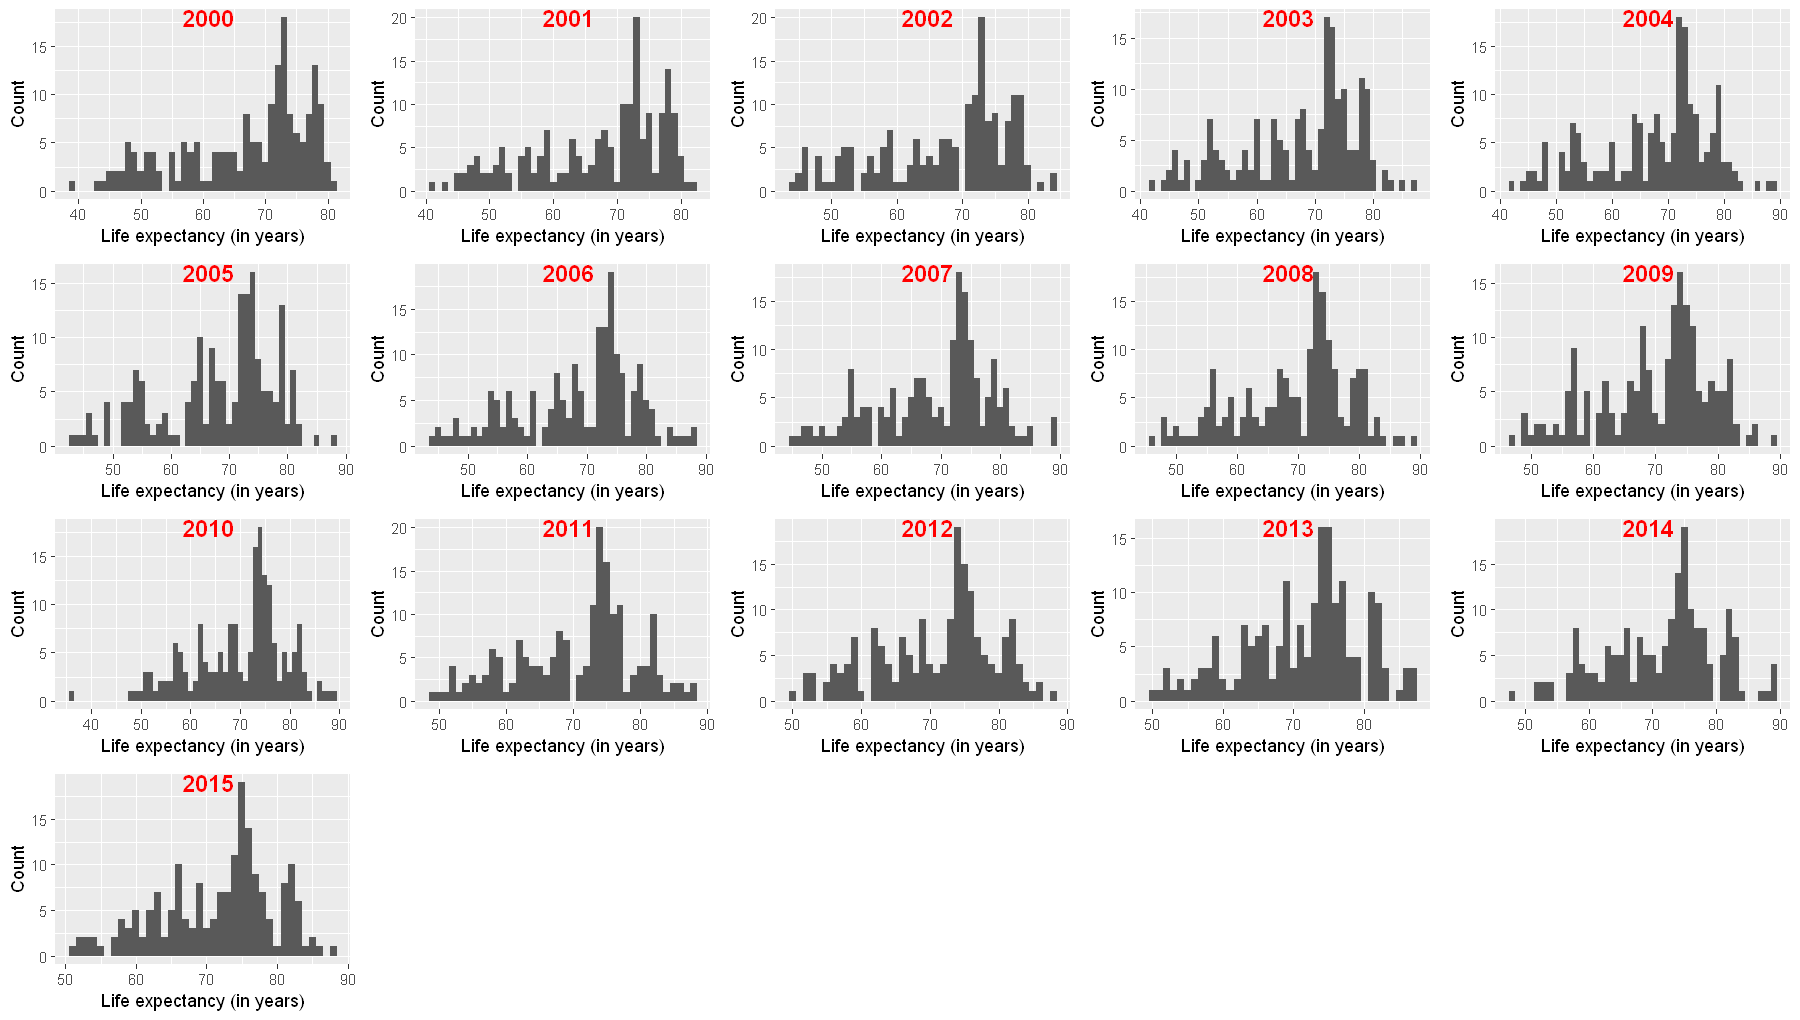

In [7]:
# Define a function that plots by years

plot_each_year <- function(i)
  {plot<-
       life_tidy %>%
       filter(Year == each_year_parameter[i])%>%
       ggplot(aes(x = Life.expectancy)) +
       geom_histogram(binwidth = 1) +
       xlab("Life expectancy (in years)") +
       ylab("Count") 
  
  return(plot)}

# Store the plots

P2000<-plot_each_year(1)
P2001<-plot_each_year(2)
P2002<-plot_each_year(3)
P2003<-plot_each_year(4)
P2004<-plot_each_year(5)
P2005<-plot_each_year(6)
P2006<-plot_each_year(7)
P2007<-plot_each_year(8)
P2008<-plot_each_year(9)
P2009<-plot_each_year(10)
P2010<-plot_each_year(11)
P2011<-plot_each_year(12)
P2012<-plot_each_year(13)
P2013<-plot_each_year(14)
P2014<-plot_each_year(15)
P2015<-plot_each_year(16)

#Life expectancy distribution for all countries in each year (2000-2015)

plot_grid(P2000,P2001,P2002,P2003,P2004,P2005,P2006,P2007,P2008,P2009,P2010,P2011,P2012,P2013,P2014,P2015,ncol=5,labels=year_labels_for_each_years,hjust=-3.5,label_colour = "red")

Figure 1: Histograms of life expectancy for each year (2000-2015)

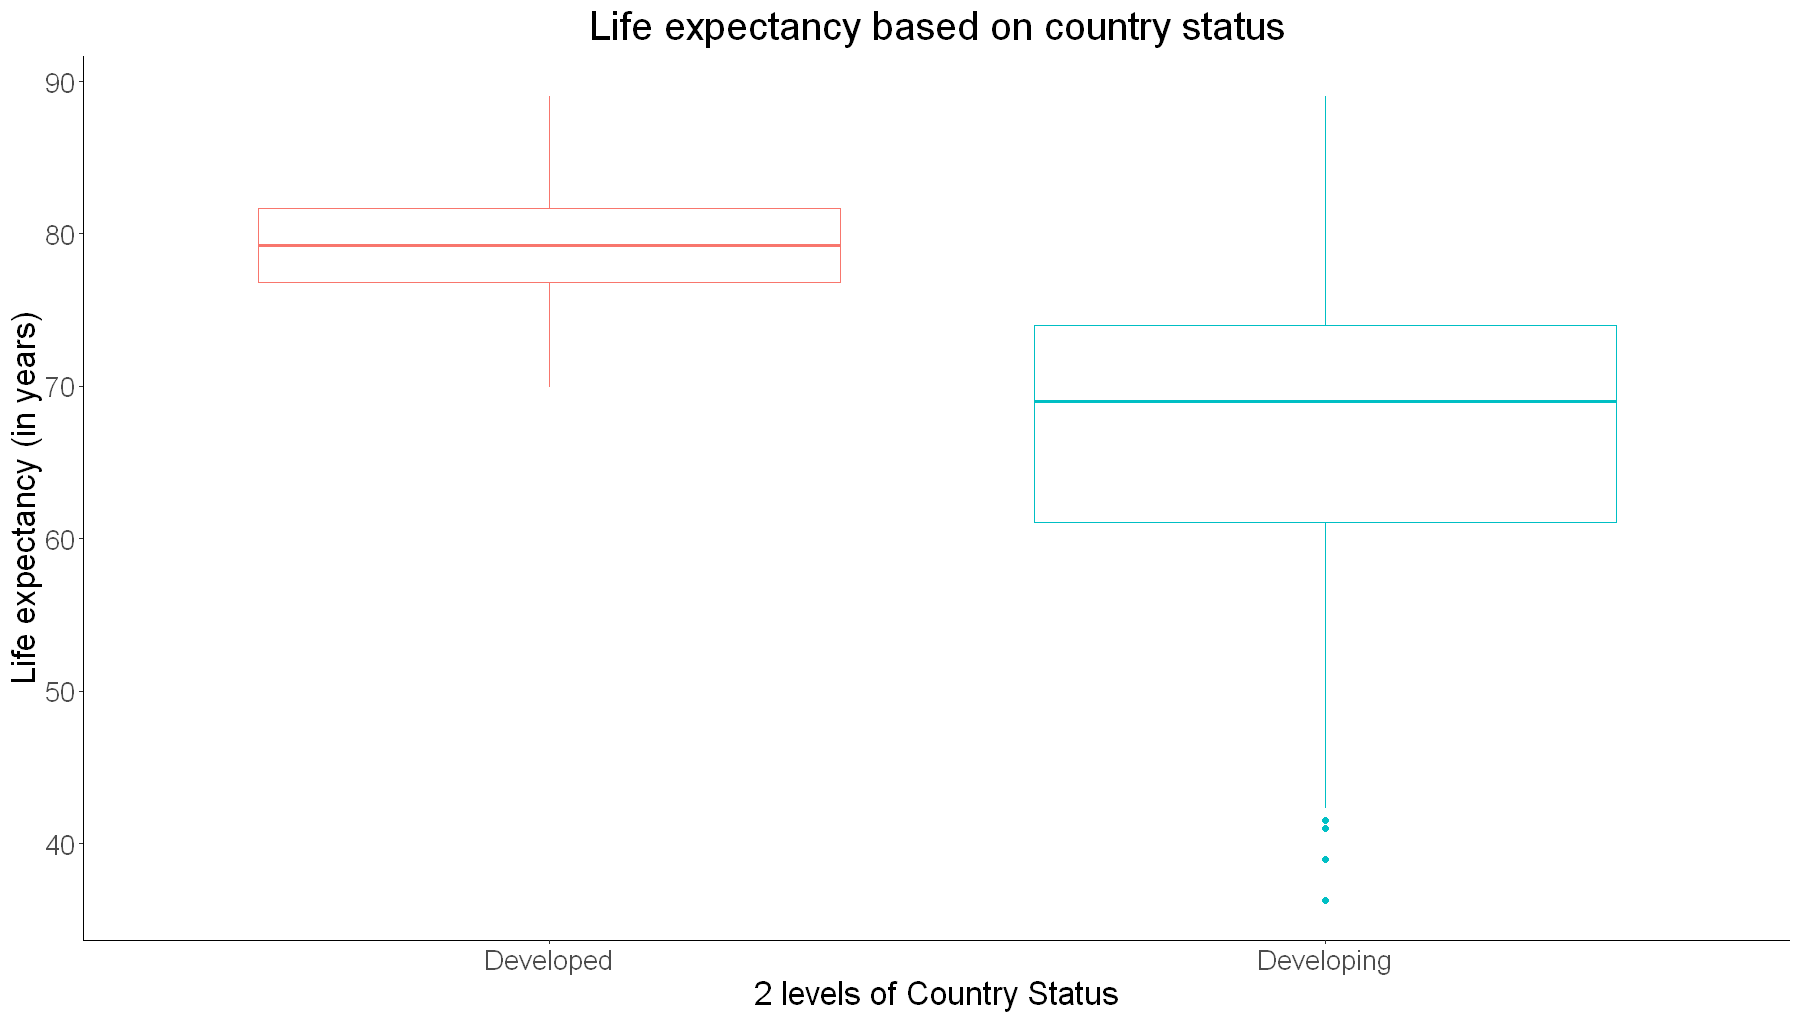

In [8]:
# Boxtplot for 2 country status

Boxplot_Country_Status <- life_tidy %>%
    ggplot(aes(x = Status, y = Life.expectancy, color = Status)) +
    geom_boxplot() +
    xlab("2 levels of Country Status") +
    ylab("Life expectancy (in years)") +
    ggtitle("Life expectancy based on country status") +
    plot_config1 +
    boxplot_scale

Boxplot_Country_Status

Figure 2: Boxplots of life expectancy based on country status

Below we divide the dataset into developed and developing and calculate the quantiles for information purposes to better understand how the values are distributed for each category

In [9]:
# Divide the dataset into 2 categories

life_developed<-life_tidy %>%
             filter(Status=="Developed")

life_developing<-life_tidy %>%
             filter(Status=="Developing")

head(life_developed)
head(life_developing)

# Calculate the quantiles for each category

print("Quantile for developed")
quantile(life_developed$Life.expectancy)

print("Quantile for developing")
quantile(life_developing$Life.expectancy)

,Country,Year,Status,Life.expectancy
,<chr>,<int>,<chr>,<dbl>
1,Australia,2015,Developed,82.8
2,Australia,2014,Developed,82.7
3,Australia,2013,Developed,82.5
4,Australia,2012,Developed,82.3
5,Australia,2011,Developed,82.0
6,Australia,2010,Developed,81.9


,Country,Year,Status,Life.expectancy
,<chr>,<int>,<chr>,<dbl>
1,Afghanistan,2015,Developing,65.0
2,Afghanistan,2014,Developing,59.9
3,Afghanistan,2013,Developing,59.9
4,Afghanistan,2012,Developing,59.5
5,Afghanistan,2011,Developing,59.2
6,Afghanistan,2010,Developing,58.8


[1] "Quantile for developed"


0%   25%   50%   75%  100% 
69.90 76.80 79.25 81.70 89.00

[1] "Quantile for developing"


0%  25%  50%  75% 100% 
36.3 61.1 69.0 74.0 89.0

Table 3: Divided dataset

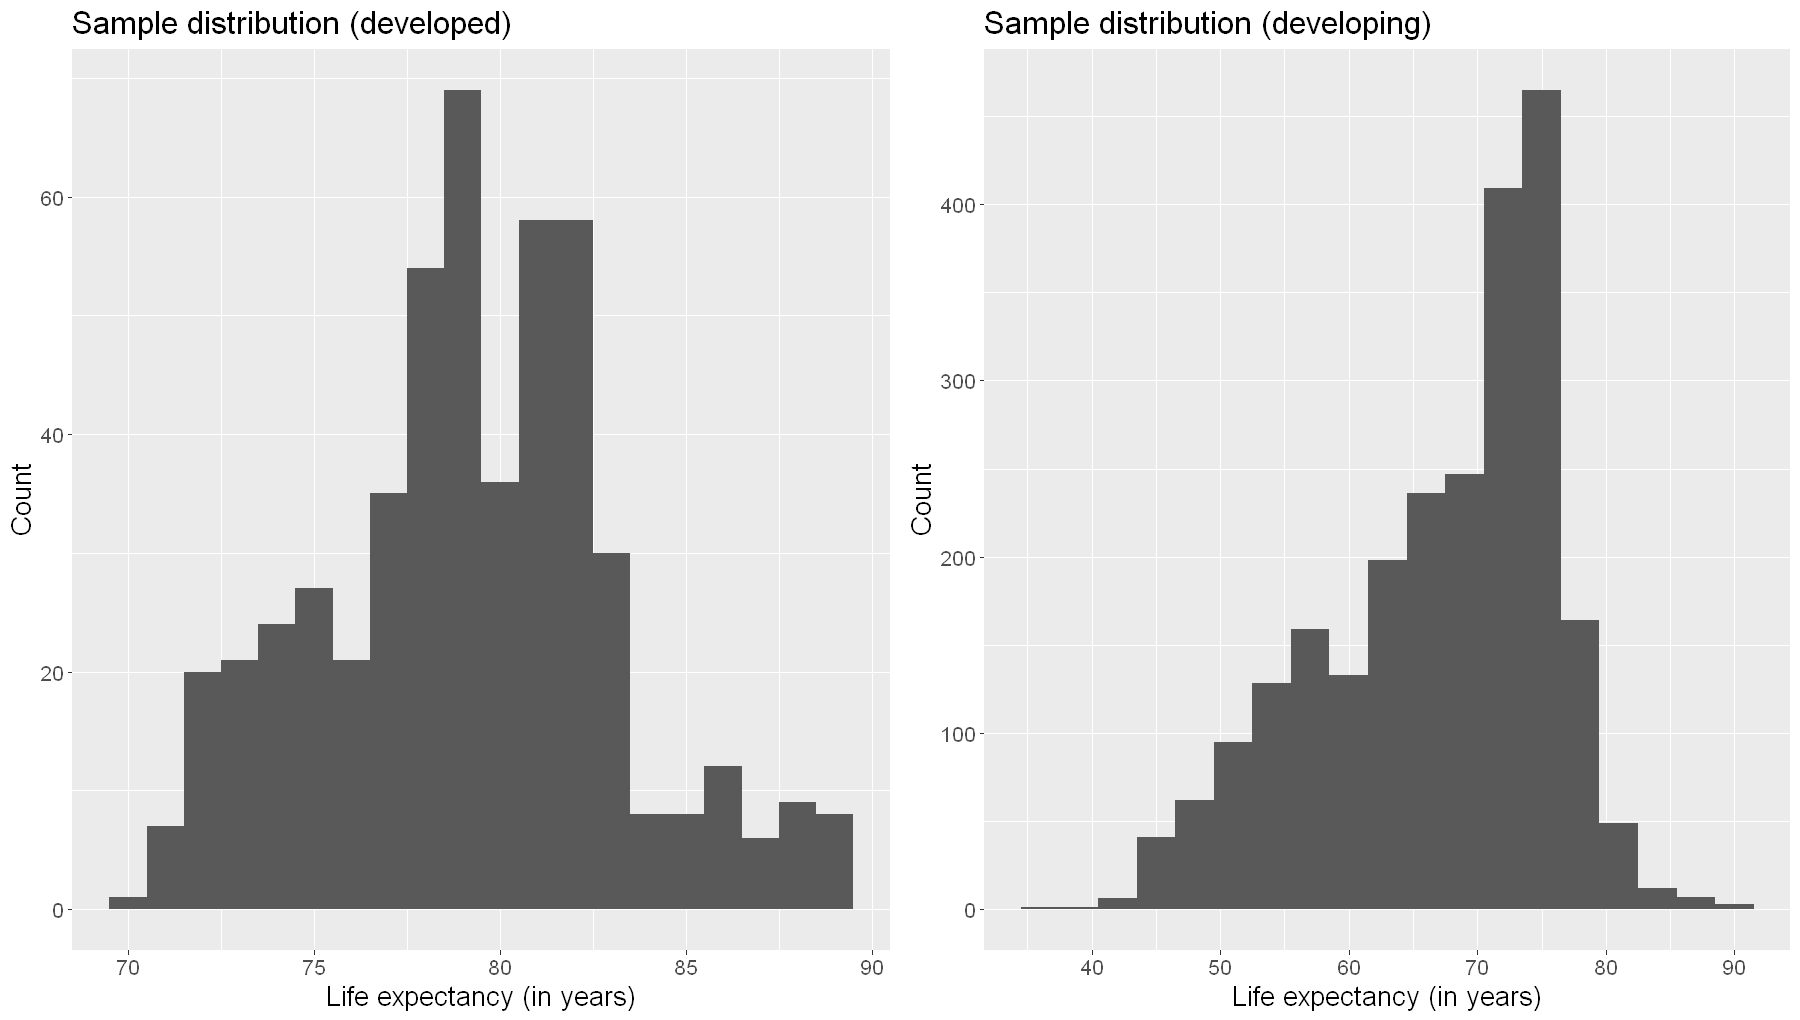

In [10]:
# The sample distribution for each country status

developed_sample_dis<-life_developed%>%
             ggplot(aes(x = Life.expectancy)) +
             geom_histogram(binwidth = 1) +
             xlab("Life expectancy (in years)") +
             ylab("Count") +
             ggtitle("Sample distribution (developed)") +
             theme(text=element_text(size=16))


developing_sample_dis<-life_developing%>%
             ggplot(aes(x = Life.expectancy)) +
             geom_histogram(binwidth = 3) +
             xlab("Life expectancy (in years)") +
             ylab("Count") +
             ggtitle("Sample distribution (developing)") +
             theme(text=element_text(size=16))

plot_grid(developed_sample_dis,developing_sample_dis)

Figure 3: Sample distributions of life expectancy for each category of country status

Both of the distributions in Figure 3 are unimodal. The sample distribution for developed countries is a relatively normal distribution; however, the distribution for developing countries is right-skewed so we will need to conduct bootstrapping later in order to end up with a normal distribution.

#### Statistics of the Dataset

In [11]:
# Grouping the tidy dataset by status to calculate the mean and standard deviation of life expectancy 
#   for developing countries and developed countries

STAT_Country_Status<- life_tidy %>%
    group_by(Status) %>%
    summarise(mean_life = mean(Life.expectancy),
              sd_life = sd(Life.expectancy))

STAT_Country_Status

Status,mean_life,sd_life
<chr>,<dbl>,<dbl>
Developed,79.19785,3.930942
Developing,67.11147,9.006092


Table 4: Mean and standard deviation of life expectancy

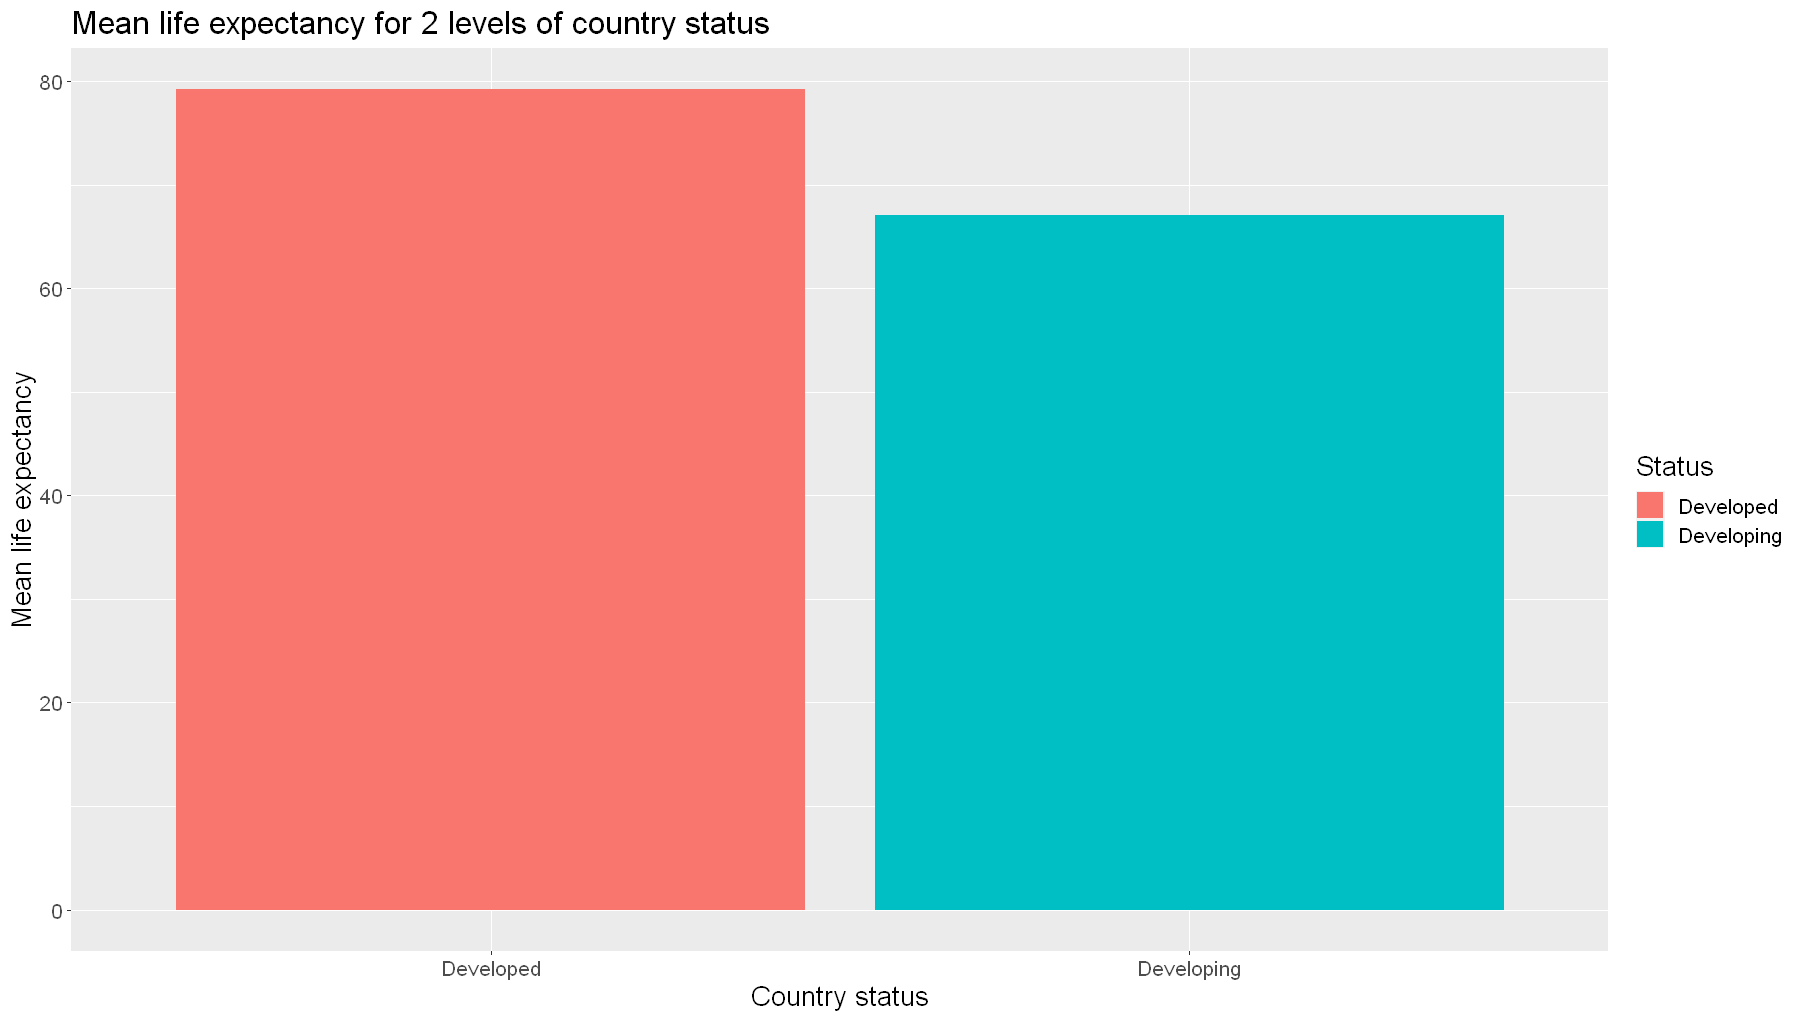

In [12]:
vis_stat_status<- STAT_Country_Status %>%
    ggplot(aes(x = Status, y = mean_life, fill = Status)) +
    geom_bar(stat = "identity") +
    xlab("Country status") +
    ylab("Mean life expectancy") +
    ggtitle("Mean life expectancy for 2 levels of country status") +
    theme(text=element_text(size=16))

vis_stat_status

Figure 4: Bar chart of mean life expectancy for each country status

# Method: Plan
The integrity of our data can be supported by the following facts: our data covers a significant period of time (15 years), was collected fairly recently, and comes from a respected organization (World Health Organization). On the other hand, our results don’t take into account measurement error, variance in how the data was collected, how the definition of a developed/developing country might change over time, and how socioeconomic inequalities can worsen or lessen over time. And also, we are navigating the population for the 20 century. Our current preliminary findings are not sufficient to deliver to a stakeholder because our results don’t take into account sampling variability and this is especially important to take into account as the boxplot visual in our graph “Life Expectancy based on Country Status” displays that there is a significant overlap between the two ranges so it’s extremely important to conduct hypothesis testing at a 10% significance level and bootstrapping to verify that our results are as precise as possible. We chose bootstrapping over asymptotics as we do not have super large sample size that could meet the Law of Large Number, as well as the fact that as seen on figure 3 the developing distribution is right skewed. We are expecting to find the life expectancy in developed countries to be greater than in developing countries. Our findings would indicate a level of correlation between the condition of the national economy and lifespan. A later study could look into what the differences are between developing countries and developed countries that lead to different lifespans, and how these factors affect the length of life.

# Confidence interval

#### Method 1: Bootstraping method

Even though only one of the distributions from figure 3 was right-skewed, to keep the work consistent, we are conducting bootstrapping on both datasets(developed and developing).

In [13]:
# Computing sample size n for each category
life_n<-life_tidy %>%
      group_by(Status)%>%
      summarise(n=n())

life_n

Status,n
<chr>,<int>
Developed,512
Developing,2416


Table 5: Sample Size of each category

Here we working with our dataset by dividing it based on country status and for each we are taking many (1000) bootstrap samples with our sample size being the entire dataset filtered based on status (calculated in table 5), so we end up with two sets of bootstrapping samples (one for each status). Then calculating the mean for each replicate for both sets of bootstrapping samples.

In [14]:
set.seed(201)

# Developed boostrapping samples
bootstrap_Developed <- life_tidy %>%
    filter(Status == "Developed") %>%
    rep_sample_n(reps= 1000, size = 512, replace = TRUE) %>%
    group_by(replicate) %>%
    summarize(mean_life = mean(Life.expectancy)) %>%
    select(mean_life)

# Developing boostrapping samples
bootstrap_Developing<- life_tidy %>%
    filter(Status == "Developing") %>%
    rep_sample_n(reps= 1000, size = 2416, replace = TRUE) %>%
    group_by(replicate) %>%
    summarize(mean_life = mean(Life.expectancy)) %>%
    select(mean_life)

Our 90% confidence interval was calculated using the quantile function with the 5% sample quantile as our lower bound and the 95% sample quantile as our upper bound (computed twice for developed and developing) to be used in Figure 5 below.

In [15]:
# Computed 90% confidence intevals

BOOT_CI_developed <- bootstrap_Developed %>%
    summarize(ci_lower = quantile(mean_life,0.05),
              ci_upper = quantile(mean_life,0.95))

BOOT_CI_developing <- bootstrap_Developing %>%
    summarize(ci_lower = quantile(mean_life,0.05),
              ci_upper = quantile(mean_life,0.95))

In [16]:
# Sample means (calculated earlier in table 4, based on the entire dataset) are being pulled for the visuals below.

developed_sample_mean<-STAT_Country_Status[1,2]%>%pull()
developing_sample_mean<-STAT_Country_Status[2,2]%>%pull()

# Plot the 90% confidence interval for developed countries (shaded blue)

ci_plot_developed <- 
    # Histogram of life expectancy for developed countries
    bootstrap_Developed %>% 
    ggplot(aes(x = mean_life)) +
    geom_histogram(colour = "white", fill = "grey", binwidth = 0.1) +
    # Shade 90% bootstrapping CI
    annotate("rect", xmin = BOOT_CI_developed$ci_lower, xmax = BOOT_CI_developed$ci_upper, ymin = 0, ymax = Inf,
             fill = "deepskyblue",
             alpha = 0.3) +
    # Red line for Sample Mean
    geom_vline(xintercept = developed_sample_mean,
               size = 2,
               colour = "red") +
    labs(title = "Bootstrapping Approximation of mean life expectancy for people living in developed countries",
         x = "Mean life expectancy (year)",
         y = "cont")  +
    plot_config1

# Plot the 90% confidence interval for developing countries (shaded blue)

ci_plot_developing <- 
    # Histogram of life expectancy for developing countries
    bootstrap_Developing %>% 
    ggplot(aes(x = mean_life)) +
    geom_histogram(colour = "white", fill = "grey", binwidth = 0.1) +
    # Shade 90% bootstrapping CI
    annotate("rect", xmin = BOOT_CI_developing$ci_lower, xmax = BOOT_CI_developing$ci_upper, ymin = 0, ymax = Inf,
             fill = "deepskyblue",
             alpha = 0.3) +
    # Red line for Sample Mean
    geom_vline(xintercept = developing_sample_mean,
               size = 2,
               colour = "red") +
    labs(title = "Bootstrapping Approximation of mean life expectancy for people living in developing countries",
         x = "Mean life expectancy (year)",
         y = "cont")  +
    plot_config1

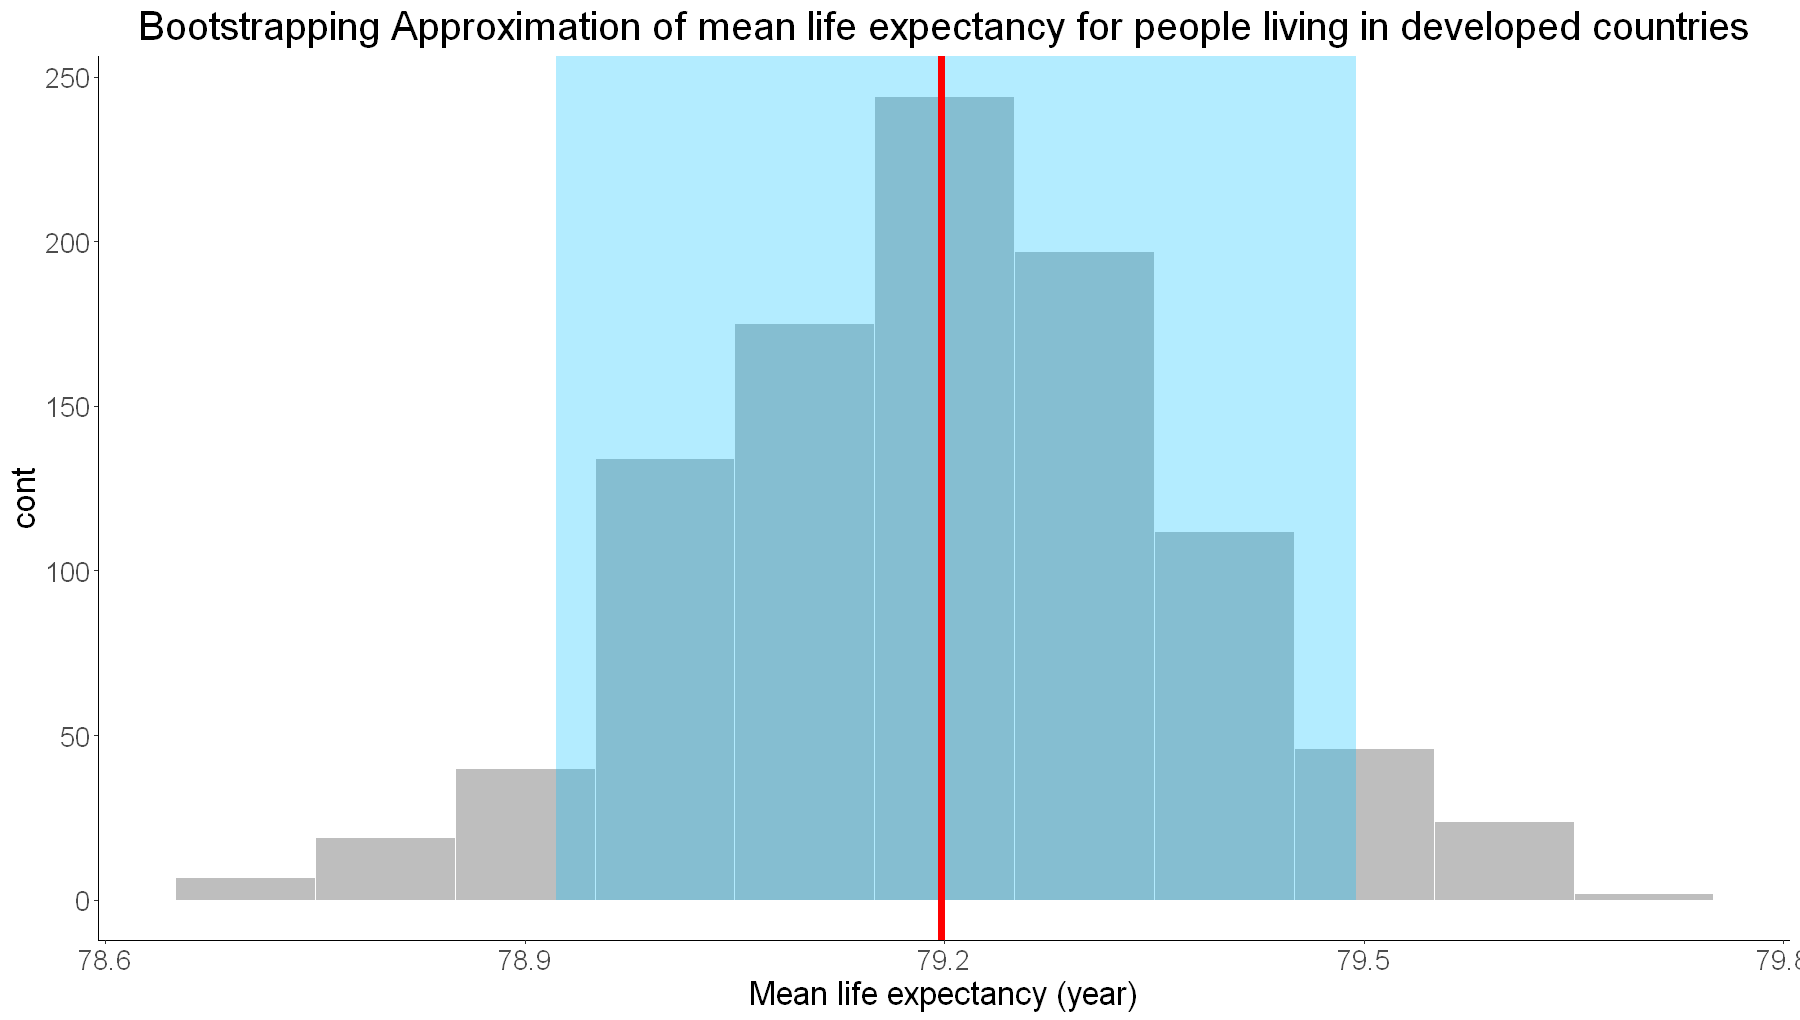

In [17]:
# The plot of confidence interval for the developed countries' life expectancy obtained by bootstraping method

ci_plot_developed

Figure 5 : Bootstrapping distribution with a shaded 90% confidence interval for developed countries

In [18]:
# Confidence interval (Developed)

BOOT_CI_developed

ci_lower,ci_upper
<dbl>,<dbl>
78.92226,79.49461


Table 6: 90% Confidence interval of average life expectancy for developed countries using bootstrapping

We are 90% confident that the true average life expectancy for developed countries between 1922-2022 falls between 78.92226 years and 79.49461 years.

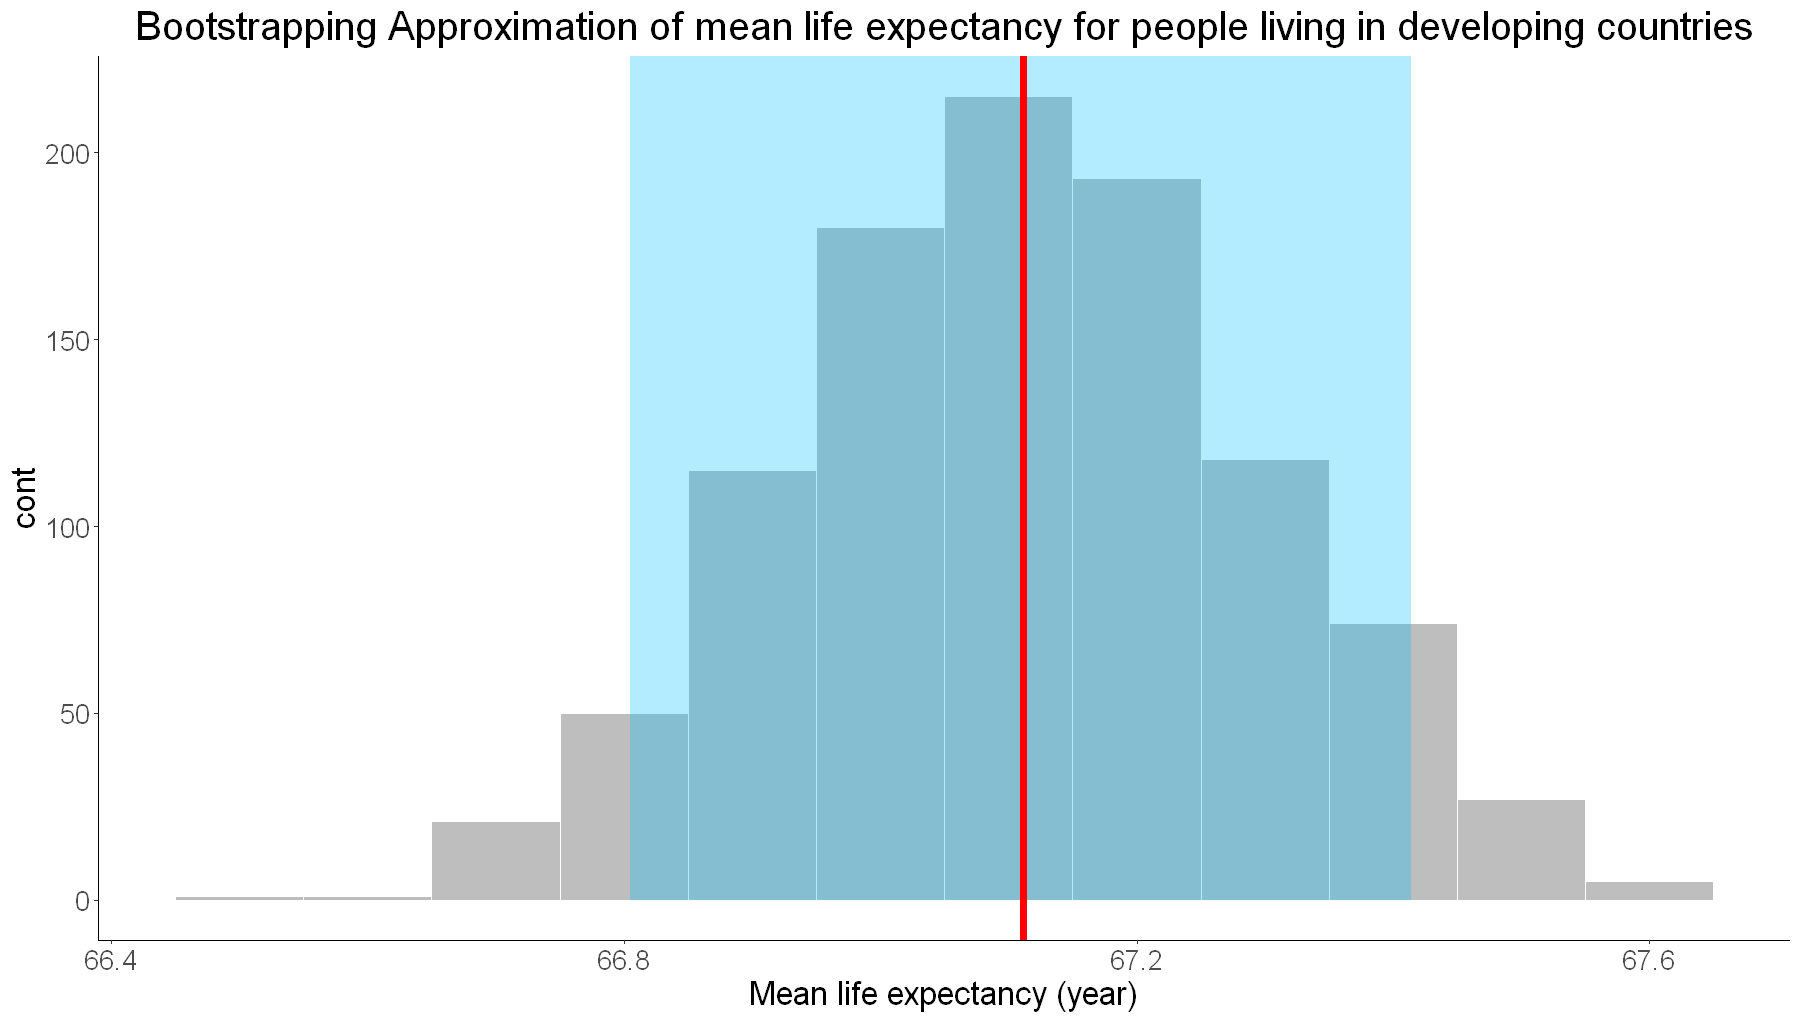

In [19]:
# The plot of confidence interval for the developing countries' life expectancy obtained by bootstraping method

ci_plot_developing

Figure 6: Bootstrapping distribution with a shaded 90% confidence interval for developing countries

In [20]:
# Confidence interval (developing)

BOOT_CI_developing

ci_lower,ci_upper
<dbl>,<dbl>
66.80508,67.41391


Table 7: 90% Confidence interval of average life expectancy for developing countries using bootstrapping

We are 90% confident that the true average life expectancy for developing countries between 1922-2022 falls between 66.80508 years and 67.41391 years.

#### Method 2: Asymptotic Method

Below is the asymptotic method of obtaining the 90% confidence interval of average life expectancy.

In [21]:
head(life_developed)
head(life_developing)

,Country,Year,Status,Life.expectancy
,<chr>,<int>,<chr>,<dbl>
1,Australia,2015,Developed,82.8
2,Australia,2014,Developed,82.7
3,Australia,2013,Developed,82.5
4,Australia,2012,Developed,82.3
5,Australia,2011,Developed,82.0
6,Australia,2010,Developed,81.9


,Country,Year,Status,Life.expectancy
,<chr>,<int>,<chr>,<dbl>
1,Afghanistan,2015,Developing,65.0
2,Afghanistan,2014,Developing,59.9
3,Afghanistan,2013,Developing,59.9
4,Afghanistan,2012,Developing,59.5
5,Afghanistan,2011,Developing,59.2
6,Afghanistan,2010,Developing,58.8


Table 8: Original tidy dataset divided based on status

Figure 7: Normal approximation overlayed on the histogram of life expectancy for developed countries

Below we are using qnorm to find the value of the 5th and 95th quantile (our lower and upper confidence level bounds) on the distribution of life expectancy for developed countries.

In [22]:
# Confidence interval

CLT_CI_developed<-tibble("Mean" = mean(life_developed$Life.expectancy),
               "Lower" = qnorm(0.05, mean(life_developed$Life.expectancy), #lower bound: 5th quantile
                               sd(life_developed$Life.expectancy) / sqrt(nrow(life_developed))),
               "Upper" = qnorm(0.95, mean(life_developed$Life.expectancy), #upper bound: 95th quantile
                               sd(life_developed$Life.expectancy) / sqrt(nrow(life_developed)))) %>%
               select(-Mean)

CLT_CI_developed

Lower,Upper
<dbl>,<dbl>
78.9121,79.4836


Table 9: 90% Confidence interval of average life expectancy for developed countries using asymptotics

We are 90% confident that the true average life expectancy for developed countries between 1922-2022 falls between 78.9121 years and 79.4836 years.

Figure 8: Normal approximation overlayed on the histogram of life expectancy for developing countries

Then we repeat to find the 5th and 95th quantile on the distribution of life expectancy for developing countries.

In [23]:
# Confidence interval

CLT_CI_developing<- tibble("Mean" = mean(life_developing$Life.expectancy),
               "Lower" = qnorm(0.05, mean(life_developing$Life.expectancy), # lower bound: 5th quantile
                               sd(life_developing$Life.expectancy) / sqrt(nrow(life_developing))),
               "Upper" = qnorm(0.95, mean(life_developing$Life.expectancy), # upper bound: 95th quantile
                               sd(life_developing$Life.expectancy) / sqrt(nrow(life_developing))))%>%
               select(-Mean)

CLT_CI_developing

Lower,Upper
<dbl>,<dbl>
66.81008,67.41285


Table 10: 90% Confidence interval of average life expectancy for developing countries using asymptotics

#### Comparing confidence intervals obtained from 2 methods

In [24]:
# Combine the developed coutries' confidence intervals together and compare the differences

cbind(BOOT_CI_developed,CLT_CI_developed)

ci_lower,ci_upper,Lower,Upper
<dbl>,<dbl>,<dbl>,<dbl>
78.92226,79.49461,78.9121,79.4836


Table 11: Confidence intervals for developed countries (left two: bootstrapping, right two: asymptotic)

Both confidence intervals for developed countries are only different by a hundredth of a year, the interval obtained by using asymptotics is slightly lower than the interval obtained by using bootstrapping.

In [25]:
# Combine the developing coutries' confidence intervals together and compare the differences

cbind(BOOT_CI_developing,CLT_CI_developing)

ci_lower,ci_upper,Lower,Upper
<dbl>,<dbl>,<dbl>,<dbl>
66.80508,67.41391,66.81008,67.41285


Table 12: Confidence intervals for developing countries (left two: bootstrapping, right two: asymptotic)

We see that, also for developing countries, both confidence intervals are only different by a hundredth of a year, with the interval obtained by using asymptotics also being slightly lower than the interval obtained by using bootstrapping.

#### Hypothesis Testing

 Our null hypothesis is that there is no difference in the mean life expectancy for developed countries (µ1) and the mean life expectancy for developing countries (µ2) between the years 1922-2022.
 
    H0 : µ1 - µ2 = 0
    
 If we are able to reject our null hypothesis at a 10% significance level (alpha=0.1) then our alternative hypothesis is that there is a positive difference between the mean life expectancy for developed countries (µ1) and the mean life expectancy for developing countries (µ2) between the years 1922-2022.
 
    Ha : µ1 - µ2 > 0                                                                                                   

In [26]:
# Pulling the values from two categories

developed<- life_developed %>%
          select(Life.expectancy) %>%
          pull(Life.expectancy)

developing <- life_developing %>%
          select(Life.expectancy) %>%
          pull(Life.expectancy)

In [27]:
# Doing two-sample t-test using the dataset seperated into the two groups based on status 
#   the alternative is "greater" as the alternative hypothesis is that there's a positive difference 

t_test <- tidy(
              t.test(developed,
                     developing,
                     alternative="greater"))

In [28]:
# The results of two-sample t-test

t_test

estimate,estimate1,estimate2,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
12.08639,79.19785,67.11147,47.86841,9.881313e-324,1807.031,11.67086,Inf,Welch Two Sample t-test,greater


The t-test calculates a non-zero (estimate=12.08639) point estimate of the difference between the average life expectancies based on country status with a p-value (9.881313e-324) less than our 10% significance level. The very low p-value means that the probability of obtaining this point estimate under the null hypothesis is 9.881313e-322 % , therefore we have enough evidence to reject the null hypothesis and accept our alternative hypothesis as the point estimate calculated is greater than zero.

# Calculating Confidence Interval using central Limit Theorem

In [29]:
# Pull the life expectancy values from each category

developed_life_values <- 
    life_developed %>%
    pull(Life.expectancy)

developing_life_values <- 
    life_developing %>%
    pull(Life.expectancy)

# Calculate the confidence interval for difference in means using CLT

life_diff_means_ci <- 
    tibble(
        lower_ci = mean(developed_life_values) - mean(developing_life_values) + 
                   qnorm(0.05,0,1) * sqrt(var(developed_life_values)/length(developed_life_values) +  #lower bound: 5th quantile
                                          var(developing_life_values)/length(developing_life_values)),
        upper_ci = mean(developed_life_values) - mean(developing_life_values) +
                   qnorm(0.95,0,1) * sqrt(var(developed_life_values)/length(developed_life_values) +  #upper bound: 95th quantile
                                          var(developing_life_values)/length(developing_life_values))
    )

In [30]:
# Result

point_estimate<- tibble(point_estimate = mean(developed_life_values) - mean(developing_life_values))

cbind(point_estimate,life_diff_means_ci)

point_estimate,lower_ci,upper_ci
<dbl>,<dbl>,<dbl>
12.08639,11.67107,12.5017


Using the Central Limit Theorem, we are 90% confident that the true difference in average life expectancy between developed and developing countries (respectively), between 1922-2022, is between 11.67107 and 12.5017 years.

# Discussion

Through the t-test, we found that the possibility of equal life expectancy in developing countries and developed countries is significantly small (1.02819e-318), which favors the alternative hypothesis: life expectancy of developed countries is longer than developing countries in the past century (1922-2022). This result implicates the condition of the national economy and people’s lifespan has a strong positive relation，which is the same as what we expected in the proposal. Considering the p value of null hypothesis almost equals to zero, the life expectancy gap between two status countries truly exists. Through this study we can learn the vast differences in circumstances between developing and developed in the perspective of life expentancy. As our study only looks at the difference in average life expectancy between developed and developing countries in futures studies it would be interesting to put other factors such as healthcare index and finding the correlation with different factors and average life expectancy of a country. A later study could look into what the differences are between developing countries and developed countries that lead to different lifespans, and how these factors affect the length of life.

-----------------------------------------------

# References
Freeman, T., Gesesew, H. A., Bambra, C., Giugliani, E. R. J., Popay, J., Sanders, D., ... & Baum, F. (2020). Why do some countries do better or worse in life expectancy relative to income? An analysis of Brazil, Ethiopia, and the United States of America. International journal for equity in health, 19(1), 1-19.

Preston, S. H. (1975). The changing relation between mortality and level of economic development. Population studies, 29(2), 231-248.

W.H.O (2018, February 10). Life expectancy (WHO). Kaggle. Retrieved July 26, 2022, from https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who